<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%207%20-%20Machine%20Learning/Linear_regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn #NEW!!✨
import torch.optim as optim #NEW!!✨
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Step 1: Data Creation and Exploration
# Generating synthetic data: House Prices vs. Size (in sq. ft.)
data = {'Size': [i*100 for i in range(5, 151)],
        'Price': [50000 + 3000*size + 25000*torch.randn(1).item() for size in range(5, 151)]}
house_data = pd.DataFrame(data)

In [3]:
house_data.head(3)

,Size,Price
0,500,56132.209450
1,600,76949.434012
2,700,57770.378053


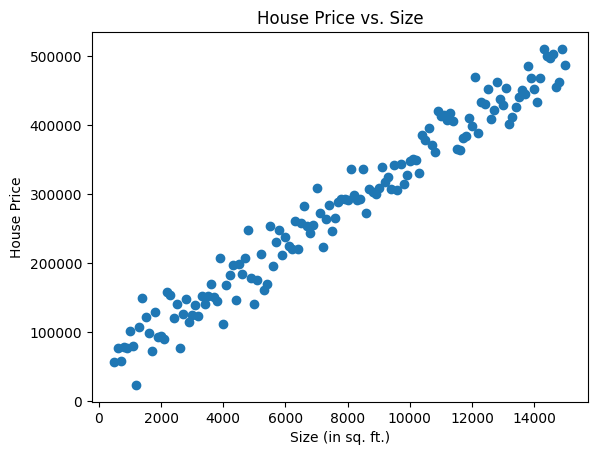

In [4]:
# Visualize 🏠📏💵 relationship
plt.scatter(house_data['Size'], house_data['Price'])
plt.xlabel('Size (in sq. ft.)')
plt.ylabel('House Price')
plt.title('House Price vs. Size')
plt.show()

In [5]:
# Step 2: Preprocessing
X = house_data[['Size']]
y = house_data['Price']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [8]:
# Step 3: Model Building
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, X):
        return self.linear(X)

In [9]:
model = LinearRegressionModel(X_train.shape[1])

In [10]:
# Step 4: Model Training
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 100000
train_loss_values = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_func(y_pred, y_train)
    train_loss_values.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

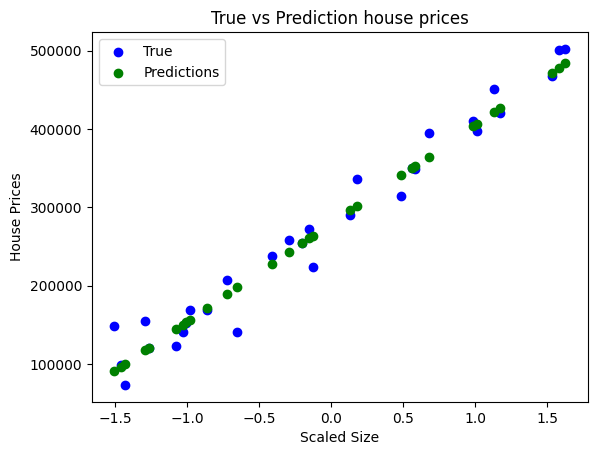

In [11]:
# Step 5: Model Evaluation
# Evaluate on test data

model.eval()

with torch.no_grad():
    predictions = model(X_test)
    plt.scatter(X_test.numpy(), y_test.numpy(), label='True', color='blue')
    plt.scatter(X_test.numpy(), predictions.numpy(), label='Predictions', color='green')
    plt.xlabel("Scaled Size")
    plt.ylabel("House Prices")
    plt.title("True vs Prediction house prices")
    plt.legend()
    plt.show()